<a href="https://colab.research.google.com/github/earthimmortal/DigHum100/blob/main/Dighum100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Channing Lee


Class: DIG HUM 100

Instructor: Adam Anderson

DATASET:
https://www.kaggle.com/spscientist/students-performance-in-exams

### 0) Table of Contents:

1) Import files and libraries needed for Data Analysis<br> 
2) Mounting Google Drive to Google Colab <br>
3) Reading in the Dataset <br>
4) Main Hypothesis and Research Question <br>
5) Exporatory Data Analysis and Data Cleaning 
 <br> >  5.1) Early Graphs <br>
6) Machine Learning Algorithms
 <br> >  6.1) Linear Regression 
 <br> >  6.2) Ridge Regression 
 <br> >  6.3) Lasso Regression
 <br> >  6.4) Random Forest Regression
 <br> >  6.5) Principal Component Analysis/Regression <br>
7) Graphs for further analysis





# 1) *Import files and libraries needed for Data Analysis*



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import random
import torch
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm
from sklearn import preprocessing
from sklearn import ensemble
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.model_selection import  train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
from yellowbrick.regressor import residuals_plot
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.



# 2) *Mounting Google Drive to Google Colab*

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 3) *Reading in the Dataset*

In [ ]:
dataset= pd.read_csv('/content/drive/My Drive/Channing Lee/Dataset/StudentsPerformance.csv')


In [ ]:
dog = np.array([])

In [ ]:
#Displaying the Dataset

In [ ]:
dataset

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


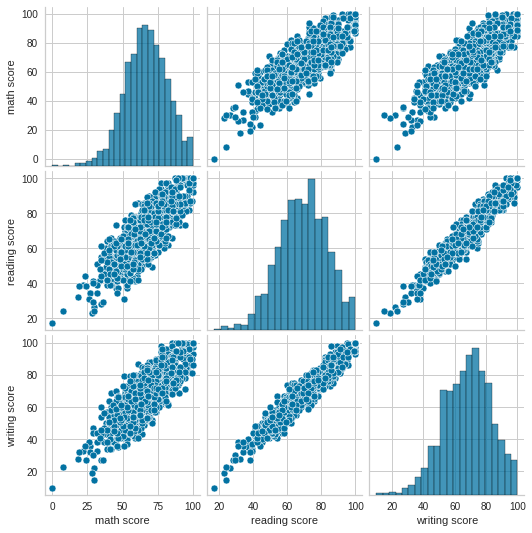

In [ ]:
sns.pairplot(dataset)

## 4) Main Hypothesis and research questions

Main question:

 1) How can we increase the scores of high school students?

Sub questions:
 
 1) How does factors such as gender, race/ethnicity, parental level of education, and etc affect student test performance?

 2) What factors affect math score the most and the least?

 3) What factors affect writing score the most and the least?

 4) What factors affect reading score the most and the least?

 5) Do the factors that affect each individual score (math, writing, and reading) the most have the same impact on the total score?
 


## 5) Exploratory Data Analysis and Data Cleaning

Created a new column "total score" so I can use it to test the 5th Sub Question

In [ ]:
dataset["total score"] = dataset["math score"] + dataset["reading score"] + dataset["writing score"]

Create a percent correct column 

In [ ]:
dataset["percent correct"] = dataset["total score"]/300

Completed Dataset with all columns that will be used in the analysis

Total: 10 columns


In [ ]:
dataset

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,percent correct
0,female,group B,bachelor's degree,standard,none,72,72,74,218,0.726667
1,female,group C,some college,standard,completed,69,90,88,247,0.823333
2,female,group B,master's degree,standard,none,90,95,93,278,0.926667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,0.493333
4,male,group C,some college,standard,none,76,78,75,229,0.763333
...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,282,0.940000
996,male,group C,high school,free/reduced,none,62,55,55,172,0.573333
997,female,group C,high school,free/reduced,completed,59,71,65,195,0.650000
998,female,group D,some college,standard,completed,68,78,77,223,0.743333


Overall statistics about the Data

In [ ]:
dataset.describe()

,math score,reading score,writing score,total score,percent correct
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000,203.312000,0.677707
std,15.16308,14.600192,15.195657,42.771978,0.142573
min,0.00000,17.000000,10.000000,27.000000,0.090000
25%,57.00000,59.000000,57.750000,175.000000,0.583333
50%,66.00000,70.000000,69.000000,205.000000,0.683333
75%,77.00000,79.000000,79.000000,233.000000,0.776667
max,100.00000,100.000000,100.000000,300.000000,1.000000


# 5.1) Early graphs 

Box plot of gender and percent correct


In [ ]:
px.box(dataset, x = "gender", y = "percent correct")

Box plot of race ethincity and percent correct

In [ ]:
px.box(dataset, x= "race/ethnicity", y = "percent correct")

Remove cell

In [ ]:
px.histogram(dataset, x= "parental level of education", y = "percent correct" ,color = "gender")

Pie chart of percent correct pased on parental level of education

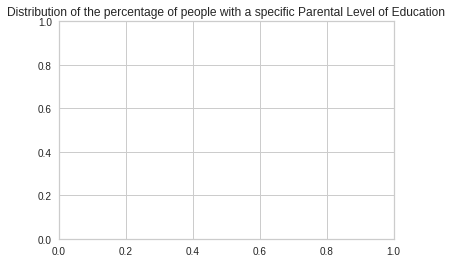

In [ ]:
plt.title("Distribution of the percentage of people with a specific Parental Level of Education")
px.pie(dataset, values = "percent correct", names = "parental level of education")

Pie chart of percent correct based on race/ethnicity

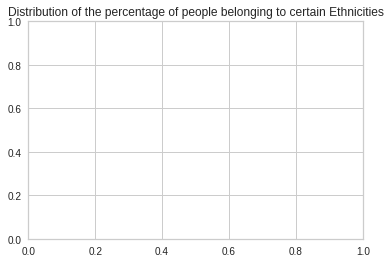

In [ ]:
plt.title("Distribution of the percentage of people belonging to certain Ethnicities")
px.pie(dataset, values = "percent correct", names = "race/ethnicity")

In [ ]:
datasetforgraphs = dataset.copy(deep= True)

In [ ]:
datasetforgraphs

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,percent correct
0,female,group B,bachelor's degree,standard,none,72,72,74,218,0.726667
1,female,group C,some college,standard,completed,69,90,88,247,0.823333
2,female,group B,master's degree,standard,none,90,95,93,278,0.926667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,0.493333
4,male,group C,some college,standard,none,76,78,75,229,0.763333
...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,282,0.940000
996,male,group C,high school,free/reduced,none,62,55,55,172,0.573333
997,female,group C,high school,free/reduced,completed,59,71,65,195,0.650000
998,female,group D,some college,standard,completed,68,78,77,223,0.743333


In [ ]:
dataset

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,percent correct
0,female,group B,bachelor's degree,standard,none,72,72,74,218,0.726667
1,female,group C,some college,standard,completed,69,90,88,247,0.823333
2,female,group B,master's degree,standard,none,90,95,93,278,0.926667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,0.493333
4,male,group C,some college,standard,none,76,78,75,229,0.763333
...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,282,0.940000
996,male,group C,high school,free/reduced,none,62,55,55,172,0.573333
997,female,group C,high school,free/reduced,completed,59,71,65,195,0.650000
998,female,group D,some college,standard,completed,68,78,77,223,0.743333


# 6) Machine Learning Algorithms
    

For this portion of the project, I will be using Machine Learning Algorithims such as Linear Regression, Lasso Regression, Ridge Regression, Random Forest, and Principal Component Regression

Dataset Preparation:
In order to run the Machine learning algoritms above, I need to change all the variables to numberic values

In [ ]:
datasetcopy = dataset
datasetcopy["gender"].replace({"female": 1, "male" : 2}, inplace = True)
datasetcopy["race/ethnicity"].replace({"group A": 1, "group B": 2, "group C": 3, "group D": 4, "group E": 5}, inplace = True)
datasetcopy["parental level of education"].replace({"some high school": 1, "high school" : 2, "some college": 3, "associate's degree": 4, "bachelor's degree": 5, "master's degree" : 6}, inplace = True)
datasetcopy["test preparation course"].replace({"none": 1 , "completed": 2}, inplace = True)
datasetcopy["lunch"].replace({"free/reduced" : 1 , "standard": 2},inplace = True)

In [ ]:
datasetcopy

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,percent correct
0,1,2,5,2,1,72,72,74,218,0.726667
1,1,3,3,2,2,69,90,88,247,0.823333
2,1,2,6,2,1,90,95,93,278,0.926667
3,2,1,4,1,1,47,57,44,148,0.493333
4,2,3,3,2,1,76,78,75,229,0.763333
...,...,...,...,...,...,...,...,...,...,...
995,1,5,6,2,2,88,99,95,282,0.940000
996,2,3,2,1,1,62,55,55,172,0.573333
997,1,3,2,1,2,59,71,65,195,0.650000
998,1,4,3,2,2,68,78,77,223,0.743333


# 6.1) Linear Regression

Linear Regression using math score as the response variable

In [ ]:
#Split predictors and assign to X

In [ ]:
X = dataset.iloc[:, 0:5]

In [ ]:
X

,gender,race/ethnicity,parental level of education,lunch,test preparation course
0,1,2,5,2,1
1,1,3,3,2,2
2,1,2,6,2,1
3,2,1,4,1,1
4,2,3,3,2,1
...,...,...,...,...,...
995,1,5,6,2,2
996,2,3,2,1,1
997,1,3,2,1,2
998,1,4,3,2,2


In [ ]:
#Used math as Response

In [ ]:
Y_math = dataset["math score"]

Created training and test data with 67% as training and 33% as test

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y_math, test_size= 0.33, random_state = 2)

In [ ]:
#Used linearregression function run linear regression and fit the data

In [ ]:
Linearmodelmath = LinearRegression(fit_intercept=False)
Linearmodelmath.fit(X_train, Y_train)
Y_pred = Linearmodelmath.predict(X_test)

Created a function called rmse ( ROOT MEAN SQUARED ERROR) to compare the different models.

In [ ]:
def rmse(actual_y, predicted_y):
    return np.sqrt(np.mean((actual_y - predicted_y)**2))

In [ ]:
#Calculated RMSE on X test data

In [ ]:
test_error_linear_math = rmse(Y_test, Linearmodelmath.predict(X_test))

In [ ]:
#FOUND TEST ERROR

In [ ]:
print("Test RMSE:", test_error_linear_math)

Test RMSE: 13.630749359091372


In [ ]:
#COEFFIECIENTS

In [ ]:
Linearmodelmath.coef_

array([ 8.45075558,  3.48326935,  2.37581421, 13.53431467,  9.24709448])

In [ ]:
#INTERCEPT

In [ ]:
Linearmodelmath.intercept_

0.0

In [ ]:
# For the rest of the notebook, I did the same thing for both lasso and ridge regression

Linear Regression using reading score as the response variable

In [ ]:
Y_read = dataset["reading score"]

In [ ]:
#Split TEST TRAINING

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y_read, test_size= 0.33, random_state = 2)

In [ ]:
#Running Linear Regression and fitting training data and predicting Y

In [ ]:
Linearmodelread = LinearRegression(fit_intercept=False)
Linearmodelread.fit(X_train, Y_train)
Y_pred = Linearmodelread.predict(X_test)

In [ ]:
#ROOT MEAN SQUARED ERROR

In [ ]:
test_error_linear_read = rmse(Y_test, Linearmodelread.predict(X_test))

In [ ]:
#Printing the test error of reading from Linear

In [ ]:
print("Test RMSE:", test_error_linear_read)

Test RMSE: 15.427214220485427


In [ ]:
#Displaying coefficient

In [ ]:
Linearmodelread.coef_

array([ 0.29525313,  3.78775894,  3.60156623, 14.53928481, 15.2566129 ])

In [ ]:
#Displaying Intercepts

In [ ]:
Linearmodelread.intercept_

0.0

Linear Regression using writing score as the response variable

In [ ]:
#Defining Y_write as writing score

In [ ]:
Y_write = dataset["writing score"]

In [ ]:
# Train test split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y_write, test_size= 0.33, random_state = 2)

In [ ]:
#Defining Linear regression and fitting data and predicting Y variable

In [ ]:
Linearmodelwrite = LinearRegression(fit_intercept=False)
Linearmodelwrite.fit(X_train, Y_train)
Y_pred = Linearmodelwrite.predict(X_test)

In [ ]:
#Calculating RMSE of linear Write

In [ ]:
test_error_linear_write = rmse(Y_test, Linearmodelwrite.predict(X_test))

In [ ]:
#Printing test error linear write

In [ ]:
print("Test RMSE:", test_error_linear_write)

Test RMSE: 14.717378952128481


In [ ]:
#Linear write coefficients

In [ ]:
Linearmodelwrite.coef_ 

array([-2.60036501,  3.77336123,  3.98033148, 14.29892816, 16.99518027])

In [ ]:
#lienar write intercept

In [ ]:
Linearmodelwrite.intercept_

0.0

Linear Regression with the scores as a whole (Wanna compare and see how things change)

In [ ]:
#Defined Y_total

In [ ]:
Y_total = dataset["total score"]

In [ ]:
#train test split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y_total ,test_size= 0.33, random_state = 2)

In [ ]:
#Linear model and fit and predict X_test

In [ ]:
Linearmodeltotal= LinearRegression(fit_intercept=False)
Linearmodeltotal.fit(X_train, Y_train)
Y_pred = Linearmodeltotal.predict(X_test)

In [ ]:
#calculating RMSE

In [ ]:
test_error_linear_total = rmse(Y_test, Linearmodeltotal.predict(X_test))

In [ ]:
#Print total for test error

In [ ]:
print("Test RMSE:", test_error_linear_total)

Test RMSE: 42.3533256099155


In [ ]:
#Linear model total coefficients

In [ ]:
Linearmodeltotal.coef_

array([ 6.1456437 , 11.04438952,  9.95771191, 42.37252765, 41.49888765])

In [ ]:
#Linear model total intercept

In [ ]:
Linearmodeltotal.intercept_

0.0

# 6.2) Ridge Regression: Used to solve multicollinearity problem

In [ ]:
#created list of alphas evenly spaced out

In [ ]:
alphas = np.arange(0.0001,1,0.001)
list = alphas.tolist()

In [ ]:
#display alphas

In [ ]:
alphas

array([1.000e-04, 1.100e-03, 2.100e-03, 3.100e-03, 4.100e-03, 5.100e-03,
       6.100e-03, 7.100e-03, 8.100e-03, 9.100e-03, 1.010e-02, 1.110e-02,
       1.210e-02, 1.310e-02, 1.410e-02, 1.510e-02, 1.610e-02, 1.710e-02,
       1.810e-02, 1.910e-02, 2.010e-02, 2.110e-02, 2.210e-02, 2.310e-02,
       2.410e-02, 2.510e-02, 2.610e-02, 2.710e-02, 2.810e-02, 2.910e-02,
       3.010e-02, 3.110e-02, 3.210e-02, 3.310e-02, 3.410e-02, 3.510e-02,
       3.610e-02, 3.710e-02, 3.810e-02, 3.910e-02, 4.010e-02, 4.110e-02,
       4.210e-02, 4.310e-02, 4.410e-02, 4.510e-02, 4.610e-02, 4.710e-02,
       4.810e-02, 4.910e-02, 5.010e-02, 5.110e-02, 5.210e-02, 5.310e-02,
       5.410e-02, 5.510e-02, 5.610e-02, 5.710e-02, 5.810e-02, 5.910e-02,
       6.010e-02, 6.110e-02, 6.210e-02, 6.310e-02, 6.410e-02, 6.510e-02,
       6.610e-02, 6.710e-02, 6.810e-02, 6.910e-02, 7.010e-02, 7.110e-02,
       7.210e-02, 7.310e-02, 7.410e-02, 7.510e-02, 7.610e-02, 7.710e-02,
       7.810e-02, 7.910e-02, 8.010e-02, 8.110e-02, 

Ridge Regression Math

In [ ]:
# Redefining Y_math

In [ ]:
Y_math = dataset["math score"]

In [ ]:
#Train test split 

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y_math, test_size= 0.33, random_state = 2)

In [ ]:
#Cross validation Ridge regression

In [ ]:
clifmath = RidgeCV(alphas = list, normalize = False, store_cv_values= True).fit(X_train, Y_train)
clifmath.alpha_

0.9991

In [ ]:
#Using optimal alpha in Ridge

In [ ]:
fullclifmath = Ridge(alpha = clifmath.alpha_, normalize= False).fit(X_train, Y_train)

In [ ]:
#displaying math coefficients ridge

In [ ]:
fullclifmath.coef_

array([ 5.9030777 ,  2.6452348 ,  1.6911944 , 10.44593273,  6.47287188])

In [ ]:
#displaying math intercept ridge

In [ ]:
fullclifmath.intercept_

17.88057058238278

In [ ]:
#RMS of ridge math

In [ ]:
test_errorridgemath = rmse(Y_test, fullclifmath.predict(X_test))

In [ ]:
#print error ridge math

In [ ]:
print("Test RMSE Ridge:", test_errorridgemath)

Test RMSE Ridge: 13.072340055562838


Ridge Regression Reading

In [ ]:
#redefintion reading score

In [ ]:
Y_read = dataset["reading score"]

In [ ]:
#Train test split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y_read, test_size= 0.33, random_state = 2)

In [ ]:
#Cross validation Ridge display optimal alpha

In [ ]:
clifread = RidgeCV(alphas = list, normalize = False, store_cv_values= True).fit(X_train, Y_train)
clifread.alpha_

0.9991

In [ ]:
# Ridge regression optimal alpha and fit

In [ ]:
fullclifread = Ridge(alpha = clifread.alpha_, normalize= False).fit(X_train, Y_train)

In [ ]:
#display read ridge coefficients

In [ ]:
fullclifread.coef_

array([-6.03010688,  1.66866377,  1.87615229,  6.84939225,  8.29397977])

In [ ]:
#display read ridge intercept

In [ ]:
fullclifread.intercept_

44.7544078357536

In [ ]:
#rmse read ridge

In [ ]:
test_errorridgeread = rmse(Y_test, fullclifread.predict(X_test))

In [ ]:
#print error ridge read

In [ ]:
print("Test RMSE Ridge:", test_errorridgeread)

Test RMSE Ridge: 12.88787827308032


Ridge Regression Writing

In [ ]:
#redifine writing 

In [ ]:
Y_write = dataset["writing score"]

In [ ]:
#train test split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y_write, test_size= 0.33, random_state = 2)

In [ ]:
#Cross validation RIDGE and optimal alph

In [ ]:
clifwrite = RidgeCV(alphas = list, normalize = False, store_cv_values= True).fit(X_train, Y_train)
clifwrite.alpha_

0.9991

In [ ]:
#RIDGE with optimal alpha

In [ ]:
fullclifwrite = Ridge(alpha = clifwrite.alpha_, normalize= False).fit(X_train, Y_train)

In [ ]:
#Ridge write coefficient

In [ ]:
fullclifwrite.coef_

array([-8.15758774,  1.90542556,  2.45912697,  7.5103711 , 10.835996  ])

In [ ]:
#Ridge write intercept

In [ ]:
fullclifwrite.intercept_

39.46997670524928

In [ ]:
#Ridge write RMSE

In [ ]:
test_errorridgewrite = rmse(Y_test, fullclifwrite.predict(X_test)) 

In [ ]:
#PRINT ERROR ridge write

In [ ]:
print("Test RMSE Ridge:", test_errorridgewrite)

Test RMSE Ridge: 12.637762224086966


Ridge Regresiion Total

In [ ]:
#define Y_total

In [ ]:
Y_total = dataset["total score"]

In [ ]:
#Train test split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y_total, test_size= 0.33, random_state = 2)

In [ ]:
#CROSS VALIDATION RIDGE and alpha

In [ ]:
cliftotal = RidgeCV(alphas = list, normalize = False, store_cv_values= True).fit(X_train, Y_train)
cliftotal.alpha_

0.9991

In [ ]:
#RIDGE REgression with optimal lambda

In [ ]:
fullcliftotal = Ridge(alpha = cliftotal.alpha_, normalize= False).fit(X_train, Y_train)

In [ ]:
#Total ridge regression coefficient

In [ ]:
fullcliftotal.coef_

array([-8.28461692,  6.21932412,  6.02647366, 24.80569608, 25.60284765])

In [ ]:
#TOtal ridge regression intercept

In [ ]:
fullcliftotal.intercept_

102.1049551233857

In [ ]:
#RMSE ridge total

In [ ]:
test_errorridgetotal = rmse(Y_test, fullcliftotal.predict(X_test))

In [ ]:
#print ridge error total

In [ ]:
print("Test RMSE Ridge:", test_errorridgetotal)

Test RMSE Ridge: 37.3823489987393


# 6.3) Lasso Regression: Used to get rid of predictors that don't impact the response variables

Lasso Regression Math Score

In [ ]:
#TRAIN test plit

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y_math, test_size= 0.33, random_state = 2) 

In [ ]:
#Lasso cross validation and find optimal alpha. Run lasso with optimal alpha

In [ ]:
lasmath = LassoCV(alphas= list, normalize= False).fit(X_train, Y_train)
lasmath.alpha_
full_lasmath = Lasso(alpha = lasmath.alpha_ , normalize= False).fit(X_train, Y_train)

In [ ]:
#Lasso math coefficent

In [ ]:
full_lasmath.coef_

array([ 5.93547374,  2.64615034,  1.69445615, 10.51400041,  6.51653276])

In [ ]:
#Lasso Math intercept

In [ ]:
full_lasmath.intercept_

17.647334693298447

In [ ]:
#Lasso math rmse error 

In [ ]:
test_errorlassomath = rmse(Y_test, full_lasmath.predict(X_test))

In [ ]:
#Lasso math error print

In [ ]:
print("Test RMSE Lasso:", test_errorlassomath)

Test RMSE Lasso: 13.074523665318557


Lasso Regression Reading Score

In [ ]:
#train test split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y_read, test_size= 0.33, random_state = 2)

In [ ]:
#Lasso cross validation to find optimal alpha and run lasso with optimal alpha

In [ ]:
lasread = LassoCV(alphas= list, normalize= False).fit(X_train, Y_train)
lasread.alpha_
full_lasread = Lasso(alpha = lasread.alpha_ , normalize= False).fit(X_train, Y_train)


In [ ]:
#lasso read coefficient

In [ ]:
full_lasread.coef_

array([-6.06767   ,  1.6696941 ,  1.87767047,  6.89770375,  8.34825472])

In [ ]:
#lasso read intercept

In [ ]:
full_lasread.intercept_

44.64780750023381

In [ ]:
#Lasso read RMSE

In [ ]:
test_errorlassoread = rmse(Y_test, full_lasread.predict(X_test))

In [ ]:
#lasso error read print

In [ ]:
print("Test RMSE Lasso:", test_errorlassoread)

Test RMSE Lasso: 12.887376769191185


Lasso Regression writing score

In [ ]:
#train test split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y_write, test_size= 0.33, random_state = 2)

In [ ]:
#Lasso cross validation to find optimal alpha and run lasso with optimal alpha

In [ ]:
laswrite = LassoCV(alphas= list, normalize= False).fit(X_train, Y_train)
laswrite.alpha_
full_laswrite= Lasso(alpha = laswrite.alpha_ , normalize= False).fit(X_train, Y_train)


In [ ]:
#lasso write coefficient

In [ ]:
full_laswrite.coef_

array([-8.20803646,  1.90667874,  2.46103672,  7.56425648, 10.90670921])

In [ ]:
#lasso write intercept

In [ ]:
full_laswrite.intercept_

39.34877266144643

In [ ]:
#lasso write rmse

In [ ]:
test_errorlassowrite = rmse(Y_test, full_laswrite.predict(X_test))

In [ ]:
#lasso write error

In [ ]:
print("Test RMSE Lasso:", test_errorlassowrite)

Test RMSE Lasso: 12.63699088964377


Lasso Regression Total Score

In [ ]:
#train test split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y_total, test_size= 0.33, random_state = 2)

In [ ]:
#lasso cross validation find optimal alpha and plug into lasso with optimal

In [ ]:
lastotal = LassoCV(alphas= list, normalize= False).fit(X_train, Y_train)
lastotal.alpha_
full_lastotal= Lasso(alpha = lastotal.alpha_ , normalize= False).fit(X_train, Y_train)


In [ ]:
#optimal lasso total coefficient

In [ ]:
full_lastotal.coef_

array([-8.34025521,  6.2226397 ,  6.03327052, 24.97686758, 25.7724004 ])

In [ ]:
#lasso total intercept

In [ ]:
full_lastotal.intercept_

101.64050975313677

In [ ]:
#lasso error total

In [ ]:
test_errorlassototal = rmse(Y_test, full_lastotal.predict(X_test))

In [ ]:
#lasso error total print

In [ ]:
print("Test RMSE Lasso:", test_errorlassototal)

Test RMSE Lasso: 37.383579282526064


# 6.4) Random Forest Regression


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y_math, test_size= 0.33, random_state = 2)

In [ ]:
RFCmath = RandomForestRegressor(n_estimators= 5000, random_state= 2)


In [ ]:
RFCmath.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=5000, n_jobs=None, oob_score=False,
                      random_state=2, verbose=0, warm_start=False)

In [ ]:
RFCmathprediction = RFCmath.predict(X_test)

In [ ]:
RFCmatherror= rmse(Y_test, RFCmathprediction)

In [ ]:
print(RFCmatherror)

15.111820053140164


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y_read, test_size= 0.33, random_state = 2)

In [ ]:
RFCread = RandomForestRegressor(n_estimators= 5000, random_state= 2)


In [ ]:
RFCread.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=5000, n_jobs=None, oob_score=False,
                      random_state=2, verbose=0, warm_start=False)

In [ ]:
RFCreadprediction = RFCread.predict(X_test)

In [ ]:
RFCreaderror= rmse(Y_test, RFCreadprediction)

In [ ]:
print(RFCreaderror)

14.861138065798864


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y_write, test_size= 0.33, random_state = 2)
RFCwrite = RandomForestRegressor(n_estimators= 5000, random_state= 2)
RFCwrite.fit(X_train, Y_train)
RFCwriteprediction = RFCwrite.predict(X_test)
RFCwriteerror= rmse(Y_test, RFCwriteprediction)
print(RFCwriteerror)


14.471262075423892


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y_total, test_size= 0.33, random_state = 2)
RFCtotal = RandomForestRegressor(n_estimators= 5000, random_state= 2)
RFCtotal.fit(X_train, Y_train)
RFCtotalprediction = RFCtotal.predict(X_test)
RFCtotalerror= rmse(Y_test, RFCtotalprediction)
print(RFCtotalerror)



42.991653577151006


# 6.5) Principal Component Analysis/Regression

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y_math, test_size= 0.33, random_state = 2)

Principal Component analysis on the entire dataset


In [ ]:
XPCA = StandardScaler().fit_transform(X)

In [ ]:
pca = PCA(n_components=2)

In [ ]:
principalcomp = pca.fit_transform(XPCA)

In [ ]:
principalDF = pd.DataFrame(data = principalcomp, columns = ['principal component 1', 'principal component 2'])

In [ ]:
finalDF = pd.concat([principalDF, Y_math], axis = 1)

Text(0, 0.5, 'Principal Component 2')

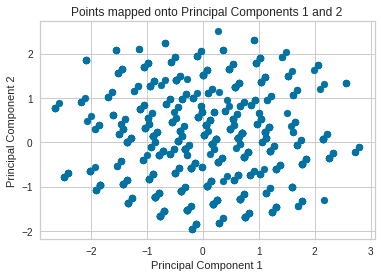

In [ ]:
plt.title("Points mapped onto Principal Components 1 and 2")
plt.scatter(data = principalDF, x = "principal component 1", y = 'principal component 2' )
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")


I can see a pattern in the data above. Going to check and see how much variance is kept in each Principal component

In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
pca = PCA(.95)

In [ ]:
pca.n_components

0.95

In [ ]:
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

In [ ]:
logisticRegr = LogisticRegression(solver = 'lbfgs')

In [ ]:
logisticRegr.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
logisticRegr.predict(X_test)

array([64, 85, 91, 53, 53, 64, 71, 81, 81, 64, 76, 62, 59, 53, 62, 76, 65,
       59, 81, 81, 79, 62, 81, 53, 64, 62, 64, 63, 62, 53, 59, 76, 76, 53,
       62, 73, 76, 59, 65, 62, 53, 53, 53, 53, 63, 81, 53, 85, 63, 77, 63,
       79, 44, 73, 65, 63, 62, 81, 62, 65, 64, 64, 81, 65, 79, 53, 63, 81,
       44, 62, 53, 53, 64, 53, 53, 81, 81, 53, 81, 53, 76, 54, 91, 81, 64,
       58, 71, 64, 53, 73, 88, 76, 44, 63, 53, 65, 52, 85, 44, 88, 65, 63,
       88, 44, 53, 58, 73, 81, 81, 77, 65, 88, 53, 77, 64, 81, 64, 65, 85,
       64, 81, 62, 58, 81, 62, 44, 53, 65, 62, 63, 71, 77, 81, 53, 88, 64,
       53, 81, 54, 76, 64, 81, 74, 53, 81, 73, 53, 64, 59, 63, 54, 44, 62,
       59, 77, 91, 76, 73, 62, 53, 54, 53, 71, 63, 63, 53, 74, 71, 76, 54,
       91, 62, 77, 73, 91, 65, 62, 63, 58, 64, 53, 63, 62, 54, 62, 81, 62,
       81, 81, 65, 54, 62, 63, 91, 58, 62, 58, 79, 62, 91, 77, 44, 59, 64,
       65, 81, 91, 54, 59, 64, 76, 53, 64, 65, 65, 62, 63, 64, 62, 53, 62,
       53, 79, 58, 64, 91

In [ ]:
logisticRegr.score(X_test, Y_test)

0.02727272727272727

In [ ]:
#Horrible accuracy representation of the data won't be using PCA will note this in the result

# 7) Graphs for further analysis 

Text(0.5, 1.0, 'Correlation Matrix between different factors')

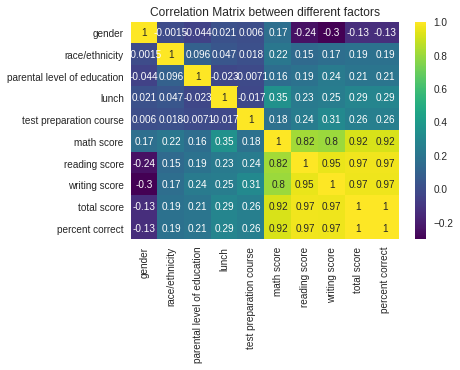

In [ ]:
sns.heatmap(dataset.corr(), annot=True, cmap = 'viridis' )
plt.title("Correlation Matrix between different factors")

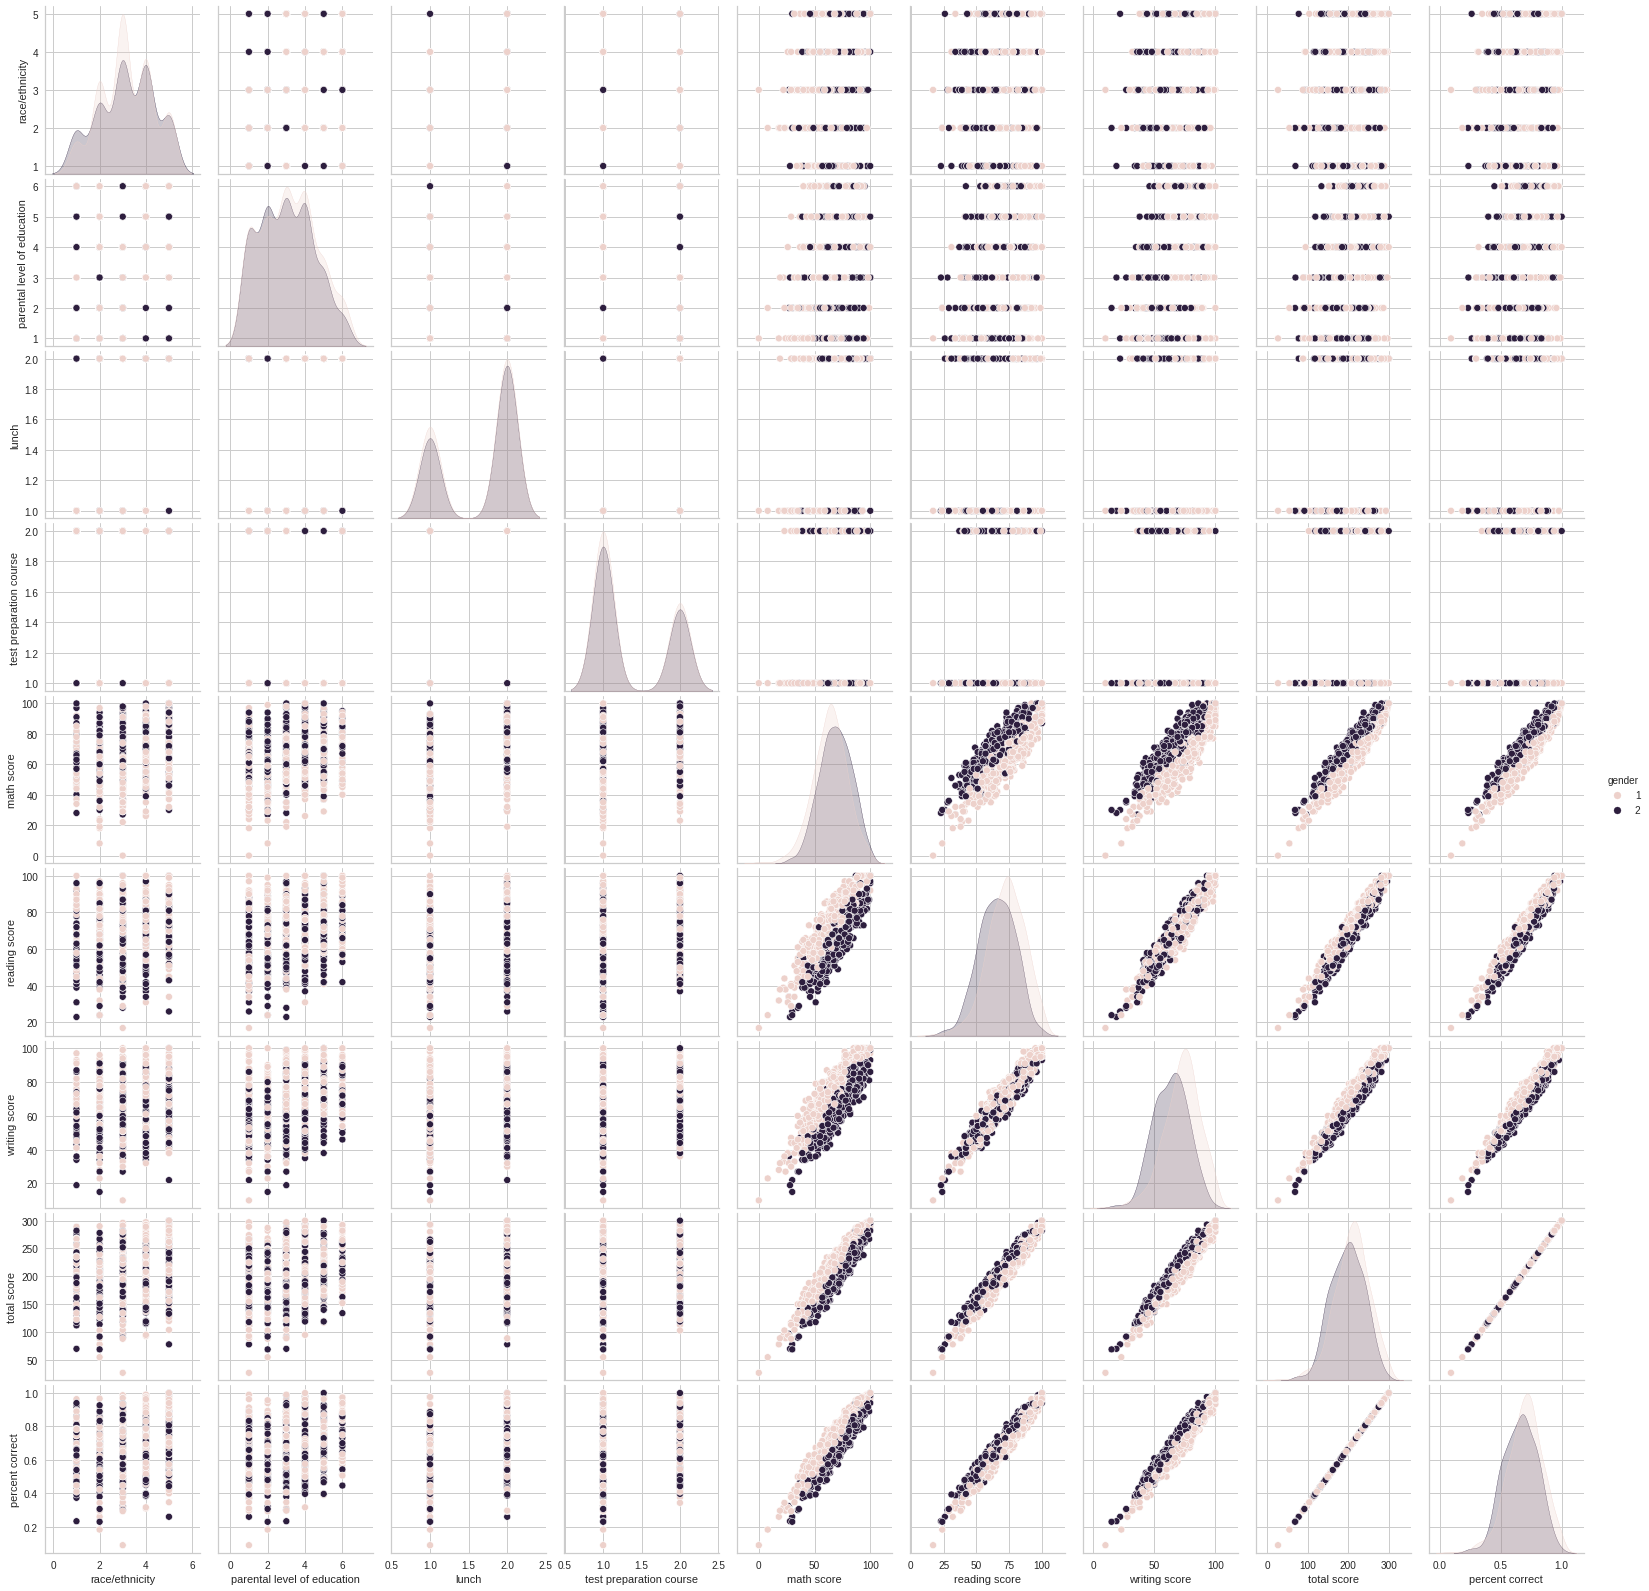

In [ ]:
sns.pairplot(hue = "gender", data = dataset)

Text(0.5, 1.0, 'Distribution of total score based on parental level of education')

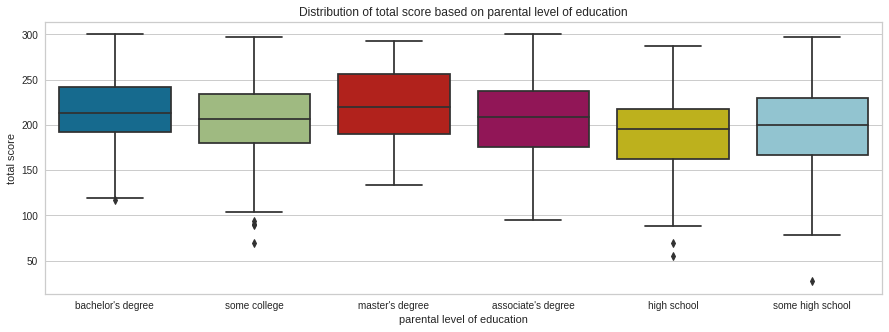

In [ ]:
plt.figure(figsize = (15,5))
sns.boxplot(x = "parental level of education", y = "total score", data = datasetforgraphs)
plt.title("Distribution of total score based on parental level of education")

Text(0, 0.5, 'Frequency')

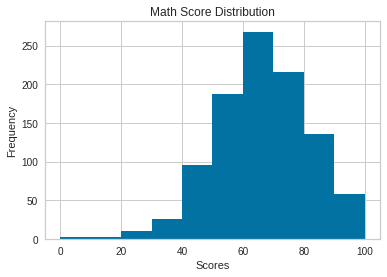

In [ ]:
plt.hist(dataset["math score"])
plt.title("Math Score Distribution")
plt.xlabel("Scores")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

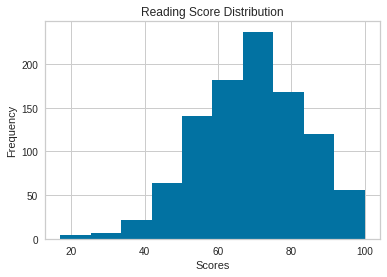

In [ ]:
plt.hist(dataset["reading score"])
plt.title("Reading Score Distribution")
plt.xlabel("Scores")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

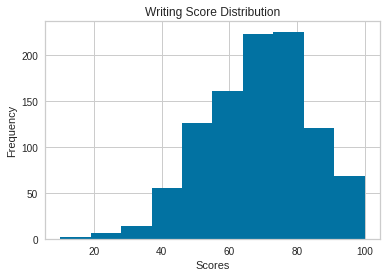

In [ ]:
plt.hist(dataset["writing score"])
plt.title("Writing Score Distribution")
plt.xlabel("Scores")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

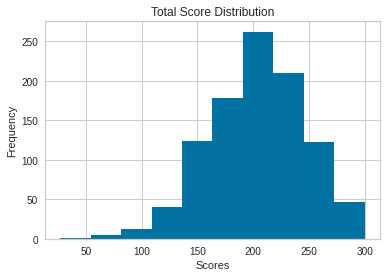

In [ ]:
plt.hist(dataset["total score"])
plt.title("Total Score Distribution")
plt.xlabel("Scores")
plt.ylabel("Frequency")

In [ ]:
#creating some tables (The tables with RMSE were created in microsoft word)

In [ ]:
columnname = pd.array(["gender",	"race/ethnicity",	"parental level of education",	"lunch",	"test preparation course"])

In [ ]:
Linearmodelmath.coef_
Linearmodelread.coef_
Linearmodelwrite.coef_
Linearmodeltotal.coef_

array([ 6.1456437 , 11.04438952,  9.95771191, 42.37252765, 41.49888765])

In [ ]:
fullclifmath.coef_
fullclifread.coef_
fullclifwrite.coef_
fullcliftotal.coef_

array([-8.28461692,  6.21932412,  6.02647366, 24.80569608, 25.60284765])

In [ ]:
full_lasmath.coef_
full_lasread.coef_
full_laswrite.coef_
full_lastotal.coef_

array([-8.34025521,  6.2226397 ,  6.03327052, 24.97686758, 25.7724004 ])

In [ ]:
mathdata = {"Predictor": columnname, "Linear math coefficients": Linearmodelmath.coef_ , "Ridge math coefficients" : fullclifmath.coef_, "Lasso math coefficients": full_lasmath.coef_}

In [ ]:
pd.DataFrame(mathdata)

,Predictor,Linear math coefficients,Ridge math coefficients,Lasso math coefficients
0,gender,8.450756,5.903078,5.935474
1,race/ethnicity,3.483269,2.645235,2.646150
2,parental level of education,2.375814,1.691194,1.694456
3,lunch,13.534315,10.445933,10.514000
4,test preparation course,9.247094,6.472872,6.516533


In [ ]:
readingdata = {"Predictor": columnname, "Linear reading coefficients": Linearmodelread.coef_, "Ridge reading coefficients": fullclifread.coef_, "Lasso reading coefficients": full_lasread.coef_}

In [ ]:
pd.DataFrame(readingdata)

,Predictor,Linear reading coefficients,Ridge reading coefficients,Lasso reading coefficients
0,gender,0.295253,-6.030107,-6.067670
1,race/ethnicity,3.787759,1.668664,1.669694
2,parental level of education,3.601566,1.876152,1.877670
3,lunch,14.539285,6.849392,6.897704
4,test preparation course,15.256613,8.293980,8.348255


In [ ]:
writingdata =  {"Predictor": columnname, "Linear writing coefficients": Linearmodelwrite.coef_, "Ridge writing coefficients": fullclifwrite.coef_, "Lasso write coefficients": full_laswrite.coef_}

In [ ]:
pd.DataFrame(writingdata)

,Predictor,Linear writing coefficients,Ridge writing coefficients,Lasso write coefficients
0,gender,-2.600365,-8.157588,-8.208036
1,race/ethnicity,3.773361,1.905426,1.906679
2,parental level of education,3.980331,2.459127,2.461037
3,lunch,14.298928,7.510371,7.564256
4,test preparation course,16.995180,10.835996,10.906709


In [ ]:
totaldata =  {"Predictor": columnname, "Linear total coefficients": Linearmodeltotal.coef_, "Ridge total coefficients": fullcliftotal.coef_, "Lasso total coefficients": full_lastotal.coef_}

In [ ]:
pd.DataFrame(totaldata)

,Predictor,Linear total coefficients,Ridge total coefficients,Lasso total coefficients
0,gender,6.145644,-8.284617,-8.340255
1,race/ethnicity,11.044390,6.219324,6.222640
2,parental level of education,9.957712,6.026474,6.033271
3,lunch,42.372528,24.805696,24.976868
4,test preparation course,41.498888,25.602848,25.772400
